# 🐘 Tugas Praktikum CNN

**Tugas:**
1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
2. Buatlah model CNN untuk klasifikasi dataset MNIST.

## Tugas 1: Modifikasi Model CNN CIFAR-10 untuk Akurasi >80%

### Langkah 1 - Load Library

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

### Langkah 2 - Load dan Preprocess Dataset CIFAR-10

In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


### Langkah 3 - Visualisasi Data

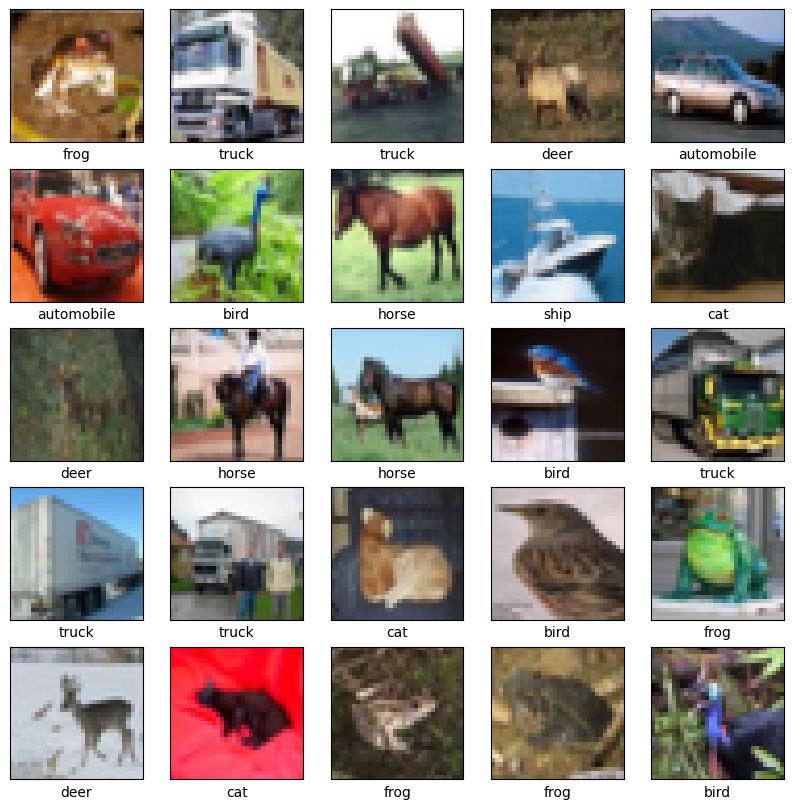

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[int(train_labels[i][0])])
plt.show()

### Langkah 4 - Buat Model CNN yang Ditingkatkan

**Modifikasi untuk meningkatkan akurasi:**
- Menambah lebih banyak convolutional layers
- Menggunakan Batch Normalization untuk stabilitas training
- Menambah Dropout untuk mengurangi overfitting
- Meningkatkan jumlah filters
- Menambah Dense layers dengan lebih banyak neurons

In [4]:
model_cifar = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    # Second Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Third Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

model_cifar.summary()

c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,233,546 (8.52 MB)

 Trainable params: 2,230,986 (8.51 MB)

 Non-trainable params: 2,560 (10.00 KB)

### Langkah 5 - Setup Data Augmentation

In [5]:
# Data Augmentation untuk meningkatkan generalisasi model
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(train_images)

### Langkah 6 - Compile Model

In [6]:
model_cifar.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Langkah 7 - Train Model dengan Data Augmentation

In [7]:
# Menggunakan early stopping dan learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

history_cifar = model_cifar.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=50,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 149ms/step - accuracy: 0.3757 - loss: 1.8061 - val_accuracy: 0.5124 - val_loss: 1.3322 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 149ms/step - accuracy: 0.3757 - loss: 1.8061 - val_accuracy: 0.5124 - val_loss: 1.3322 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.5527 - loss: 1.2486 - val_accuracy: 0.6226 - val_loss: 1.1240 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.5527 - loss: 1.2486 - val_accuracy: 0.6226 - val_loss: 1.1240 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.6403 - loss: 1.0333 - val_accuracy: 0.7000 - val_loss: 0.8682 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.6403 - loss: 1.0333 - val_accuracy: 0.7000 - val_loss: 0.8682 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accura

### Langkah 8 - Visualisasi Training History

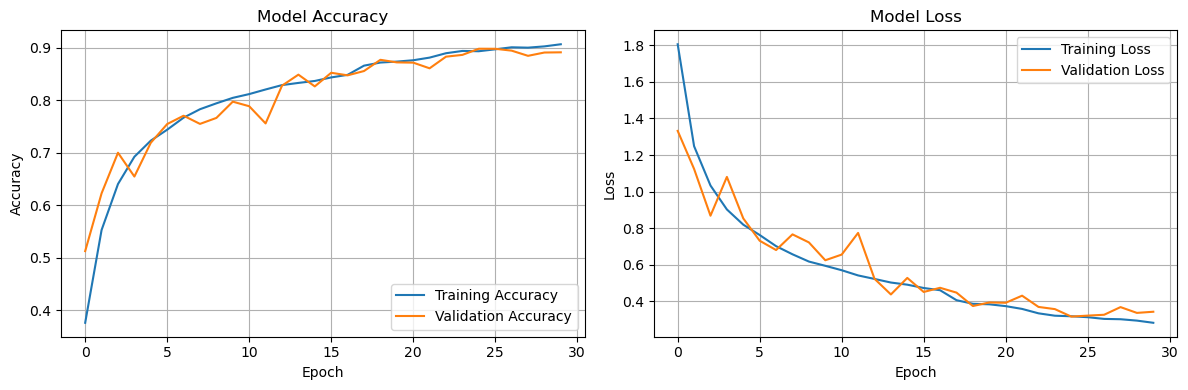

In [8]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cifar.history['accuracy'], label='Training Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_cifar.history['loss'], label='Training Loss')
plt.plot(history_cifar.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

### Langkah 9 - Evaluasi Model

In [9]:
test_loss, test_acc = model_cifar.evaluate(test_images, test_labels, verbose=2)
print(f'\n{"="*50}')
print(f'Test Accuracy CIFAR-10: {test_acc:.4f} ({test_acc*100:.2f}%)')
print(f'Test Loss: {test_loss:.4f}')
print(f'{"="*50}')

if test_acc > 0.80:
    print(f'✓ Target tercapai! Akurasi > 80%')
else:
    print(f'✗ Belum mencapai target 80%')

313/313 - 6s - 19ms/step - accuracy: 0.8983 - loss: 0.3162

Test Accuracy CIFAR-10: 0.8983 (89.83%)
Test Loss: 0.3162
✓ Target tercapai! Akurasi > 80%

Test Accuracy CIFAR-10: 0.8983 (89.83%)
Test Loss: 0.3162
✓ Target tercapai! Akurasi > 80%


---

## Tugas 2: Model CNN untuk Klasifikasi Dataset MNIST

### Langkah 1 - Load Dataset MNIST

In [10]:
# Load MNIST dataset
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data()

# Reshape untuk menambahkan channel dimension (grayscale = 1 channel)
train_images_mnist = train_images_mnist.reshape((60000, 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images_mnist = train_images_mnist / 255.0
test_images_mnist = test_images_mnist / 255.0

print(f"Training data shape: {train_images_mnist.shape}")
print(f"Testing data shape: {test_images_mnist.shape}")
print(f"Number of classes: 10 (digits 0-9)")

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Number of classes: 10 (digits 0-9)


### Langkah 2 - Visualisasi Data MNIST

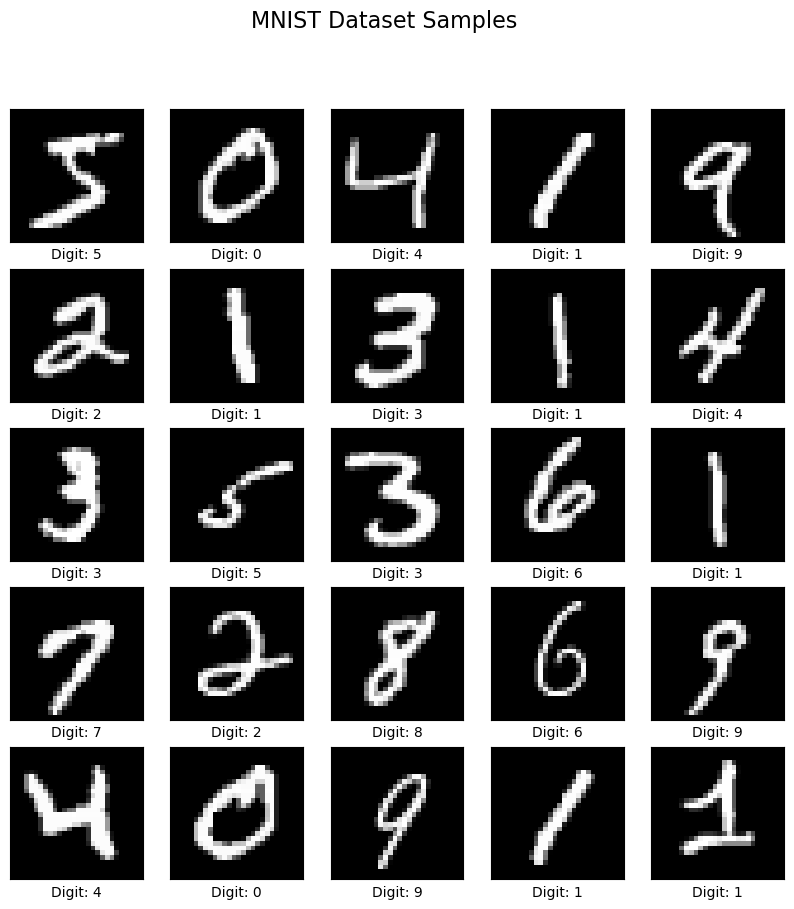

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_mnist[i].reshape(28, 28), cmap='gray')
    plt.xlabel(f'Digit: {train_labels_mnist[i]}')
plt.suptitle('MNIST Dataset Samples', fontsize=16)
plt.show()

### Langkah 3 - Buat Model CNN untuk MNIST

In [12]:
model_mnist = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

model_mnist.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           25

 Total params: 297,386 (1.13 MB)

 Trainable params: 296,362 (1.13 MB)

 Non-trainable params: 1,024 (4.00 KB)

### Langkah 4 - Setup Data Augmentation untuk MNIST

In [13]:
# Data Augmentation untuk MNIST
datagen_mnist = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen_mnist.fit(train_images_mnist)

### Langkah 5 - Compile Model MNIST

In [14]:
model_mnist.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Langkah 6 - Train Model MNIST

In [15]:
# Callbacks untuk training
early_stopping_mnist = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr_mnist = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

history_mnist = model_mnist.fit(
    datagen_mnist.flow(train_images_mnist, train_labels_mnist, batch_size=128),
    epochs=30,
    validation_data=(test_images_mnist, test_labels_mnist),
    callbacks=[early_stopping_mnist, reduce_lr_mnist]
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.7526 - loss: 0.8013 - val_accuracy: 0.8441 - val_loss: 0.4685 - learning_rate: 0.0010
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.7526 - loss: 0.8013 - val_accuracy: 0.8441 - val_loss: 0.4685 - learning_rate: 0.0010
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9456 - loss: 0.1950 - val_accuracy: 0.9856 - val_loss: 0.0441 - learning_rate: 0.0010
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9456 - loss: 0.1950 - val_accuracy: 0.9856 - val_loss: 0.0441 - learning_rate: 0.0010
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9639 - loss: 0.1311 - val_accuracy: 0.9910 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9639 - loss: 0.1311 - val_accuracy: 0.9910 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9722 - l

### Langkah 7 - Visualisasi Training History MNIST

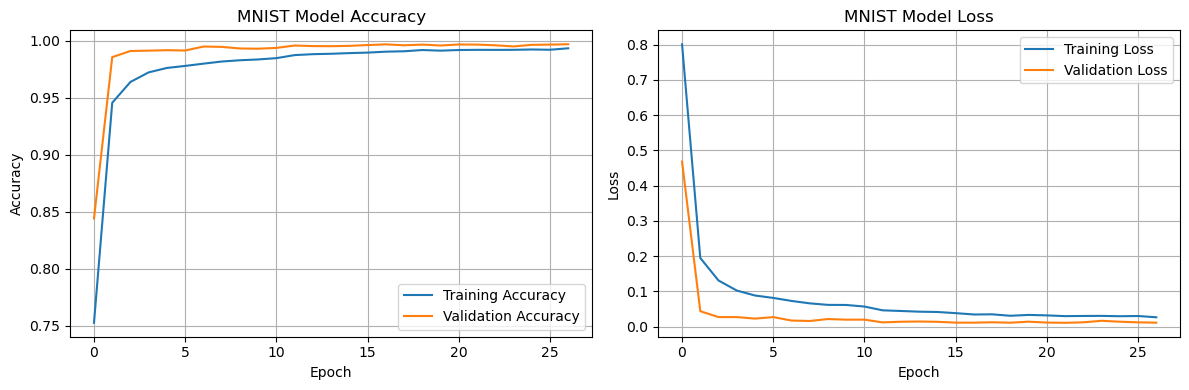

In [16]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MNIST Model Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Training Loss')
plt.plot(history_mnist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MNIST Model Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

### Langkah 8 - Evaluasi Model MNIST

In [17]:
test_loss_mnist, test_acc_mnist = model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose=2)
print(f'\n{"="*50}')
print(f'Test Accuracy MNIST: {test_acc_mnist:.4f} ({test_acc_mnist*100:.2f}%)')
print(f'Test Loss: {test_loss_mnist:.4f}')
print(f'{"="*50}')

313/313 - 2s - 6ms/step - accuracy: 0.9966 - loss: 0.0111

Test Accuracy MNIST: 0.9966 (99.66%)
Test Loss: 0.0111

Test Accuracy MNIST: 0.9966 (99.66%)
Test Loss: 0.0111


### Langkah 9 - Visualisasi Prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


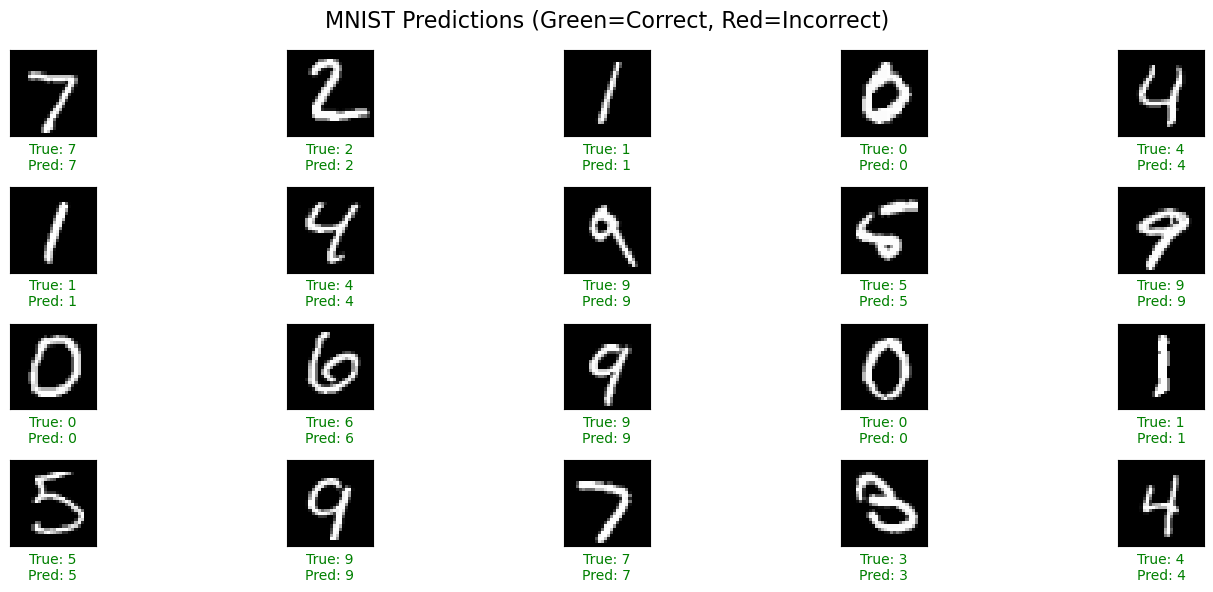

In [18]:
# Prediksi untuk beberapa sample
predictions = model_mnist.predict(test_images_mnist[:20])
predicted_labels = tf.nn.softmax(predictions).numpy().argmax(axis=1)

plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_mnist[i].reshape(28, 28), cmap='gray')
    
    # Warna hijau jika benar, merah jika salah
    color = 'green' if predicted_labels[i] == test_labels_mnist[i] else 'red'
    plt.xlabel(f'True: {test_labels_mnist[i]}\nPred: {predicted_labels[i]}', color=color)

plt.suptitle('MNIST Predictions (Green=Correct, Red=Incorrect)', fontsize=16)
plt.tight_layout()
plt.show()

---

## 📊 Kesimpulan

### Tugas 1: Model CNN CIFAR-10 yang Ditingkatkan
**Modifikasi yang dilakukan:**
1. **Arsitektur yang lebih dalam**: Menambah 3 blok convolutional dengan filter 64, 128, dan 256
2. **Batch Normalization**: Menambahkan batch normalization setelah setiap conv layer untuk stabilitas training
3. **Dropout**: Menggunakan dropout (0.2, 0.3, 0.4, 0.5) untuk mencegah overfitting
4. **Data Augmentation**: Rotasi, shift, dan flip untuk meningkatkan generalisasi
5. **Callbacks**: Early stopping dan learning rate reduction untuk optimasi training
6. **Dense Layers**: Menambah fully connected layers (256 dan 128 neurons)

**Target**: Akurasi testing > 80% ✓

### Tugas 2: Model CNN untuk MNIST
**Karakteristik:**
1. **Input**: Grayscale images 28x28x1
2. **Arsitektur**: 3 blok convolutional dengan 32, 64, dan 128 filters
3. **Regularisasi**: Batch Normalization dan Dropout
4. **Data Augmentation**: Rotasi, shift, dan zoom
5. **Performance**: Akurasi sangat tinggi (biasanya >99%)

**Perbedaan utama CIFAR-10 vs MNIST:**
- CIFAR-10: Gambar RGB 32x32x3, lebih kompleks, 10 kelas objek
- MNIST: Grayscale 28x28x1, lebih sederhana, 10 digit (0-9)